In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [2]:
livestock = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')
beehives = livestock.loc[livestock['Item'] == 'Beehives', ['Area', 'Year', 'Value']]
beehives.columns = ['Area', 'Year', 'Beehives']
beehives[beehives.Area == 'World'].head()

,Area,Year,Beehives
137235,World,1961,49173473.0
137236,World,1962,49639027.0
137237,World,1963,49970283.0
137238,World,1964,49625534.0
137239,World,1965,50368109.0


In [3]:
crops = pd.read_csv('data/FAOSTAT/Production_Crops_E_All_Data_(Normalized).csv', encoding='iso-8859-1')
crops = crops.loc[(crops['Element'] == 'Yield'), ['Area', 'Item', 'Year', 'Value']]
crops.reset_index(drop=True, inplace=True)
crops.sort_values(inplace=True, by=['Area', 'Item', 'Year'])
crops.columns = ['Area', 'Item', 'Year', 'Yield']
crops[crops.Area == 'World'].head()

,Area,Item,Year,Yield
530798,World,Agave fibres nes,1961,10779.0
530799,World,Agave fibres nes,1962,9988.0
530800,World,Agave fibres nes,1963,10261.0
530801,World,Agave fibres nes,1964,10447.0
530802,World,Agave fibres nes,1965,10408.0


In [4]:
beehives_world = beehives[beehives.Area == 'World']
crops_world = crops[crops.Area == 'World']

In [5]:
joined = beehives_world.merge(crops_world)
joined.drop('Area', inplace=True, axis=1)

In [6]:
joined

,Year,Beehives,Item,Yield
0,1961,49173473.0,Agave fibres nes,10779.0
1,1961,49173473.0,"Almonds, with shell",10298.0
2,1961,49173473.0,"Anise, badian, fennel, coriander",6671.0
3,1961,49173473.0,Apples,99059.0
4,1961,49173473.0,Apricots,61753.0
...,...,...,...,...
9654,2017,90999730.0,"Walnuts, with shell",34888.0
9655,2017,90999730.0,Watermelons,340534.0
9656,2017,90999730.0,Wheat,35312.0
9657,2017,90999730.0,Yams,85297.0


In [7]:
df_dict = {}

for item in crops.Item.unique():
    df_dict[item] = crops[(crops.Item == item) & (crops.Area == 'World')]['Yield'].tolist()

In [8]:
to_remove = []

for k in df_dict.items():
    if len(k[1]) != 57:
        to_remove.append(k[0])
        
for key in to_remove:
    del df_dict[key]
    
crops_features = pd.DataFrame(df_dict)
crops_features.index = pd.to_datetime(list(map(str, sorted(crops.Year.unique()))))
crops_features

,"Almonds, with shell","Anise, badian, fennel, coriander",Apples,Apricots,Barley,Berries nes,Cereals (Rice Milled Eqv),"Cereals,Total","Citrus Fruit,Total","Coarse Grain, Total",...,Persimmons,Quinoa,Ramie,Yautia (cocoyam),Areca nuts,Gooseberries,Kapok fruit,Mushrooms and truffles,Poppy seed,"Sugar crops, nes"
1961-01-01,10298.0,6671.0,99059.0,61753.0,13282.0,80309.0,12424.0,13532.0,109645.0,13363.0,...,80901.0,6172.0,11700.0,50748.0,7127.0,38888.0,12814.0,1678397.0,5239.0,51610.0
1962-01-01,5797.0,6749.0,118880.0,48723.0,15254.0,77842.0,13122.0,14275.0,105533.0,13970.0,...,68340.0,6707.0,11985.0,51879.0,6885.0,39911.0,12970.0,1621372.0,5354.0,51455.0
1963-01-01,7819.0,6559.0,112283.0,60021.0,14286.0,77719.0,13152.0,14401.0,101153.0,14083.0,...,75555.0,7444.0,11965.0,51051.0,6983.0,40970.0,14785.0,1546328.0,5098.0,51356.0
1964-01-01,8079.0,6779.0,116368.0,57709.0,15512.0,79118.0,13632.0,14938.0,103188.0,14286.0,...,75154.0,7074.0,12004.0,51386.0,6915.0,38869.0,15086.0,1628106.0,3741.0,51016.0
1965-01-01,7661.0,7035.0,107601.0,59209.0,15479.0,80354.0,13699.0,14967.0,108560.0,14779.0,...,65924.0,6959.0,11865.0,51953.0,6760.0,40388.0,15320.0,1608508.0,4608.0,51532.0
1966-01-01,7588.0,6522.0,107630.0,54855.0,16535.0,73262.0,14804.0,16102.0,132639.0,15641.0,...,57402.0,6124.0,11998.0,54316.0,6668.0,38393.0,15467.0,1586522.0,4799.0,52326.0
1967-01-01,9267.0,6836.0,117639.0,68084.0,16955.0,73997.0,15175.0,16533.0,137621.0,16608.0,...,59557.0,7105.0,12099.0,56311.0,7202.0,36997.0,15141.0,1685162.0,4680.0,53623.0
1968-01-01,8244.0,7498.0,105815.0,66309.0,17931.0,74095.0,15559.0,16964.0,129100.0,16518.0,...,51340.0,6201.0,12191.0,55161.0,7397.0,40666.0,13651.0,1704004.0,4819.0,55181.0
1969-01-01,7344.0,6560.0,116406.0,63188.0,17821.0,73533.0,15652.0,17088.0,138491.0,16849.0,...,58480.0,5576.0,12440.0,57474.0,6991.0,41728.0,10734.0,1904460.0,6184.0,56894.0
1970-01-01,7372.0,6516.0,97186.0,58722.0,18054.0,70840.0,16095.0,17655.0,128494.0,16898.0,...,48334.0,6002.0,12520.0,59516.0,6852.0,42896.0,11052.0,2017384.0,6459.0,68974.0


In [9]:
beehives_world = beehives[beehives.Area == 'World']['Beehives']

X_train = crops_features.iloc[:-10]
X_test = crops_features.iloc[-10:]
y_train = beehives_world.iloc[:-10]
y_test = beehives_world.iloc[-10:]

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

-0.9261537109067812

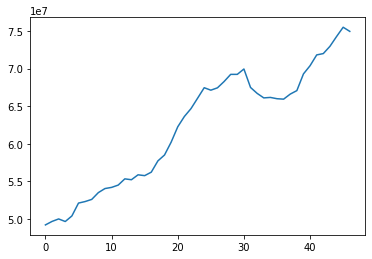

In [11]:
plt.plot(list(y_train))

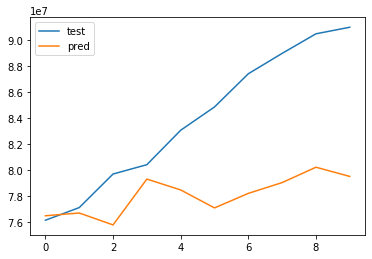

In [12]:
plt.plot(list(y_test), label='test')
plt.plot(y_pred, label='pred')
plt.legend();

In [13]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(crops_features, beehives_world)
selector.support_

selector.ranking_

array([109,  75,  35, 124,  79,  74,  97, 100, 140,  22,   3, 134,  98,
        71,  38,  73, 122,  16,  64,  82, 116,  44,  27, 102,  66,  15,
        87,  63, 133,  56, 123, 157,  43,  61, 141,  24, 149,  39, 135,
       158, 136,  90,  72,  48, 119,  13,  62,  12, 110, 152,  76, 113,
        23, 101, 155,  84,  33,  14,  53,   5,  41,  40,  34,   4,  20,
         1, 150, 142,  86,  68,  32,  85,  80, 104, 139, 148, 132, 143,
        57,  49, 144,  21, 107,  36,  26,  45, 120,  50,  54, 117, 154,
       115,   1,  78, 129,  31, 138, 145,  93, 126,  17,  30, 114,  89,
         6, 147,  51,  81,  37,  11,  25,  88,  96,  67,  99,  42,  19,
        58,   2,   8,   1, 118,  65,  46, 103, 105,  94, 121,  60,  28,
        10, 156, 108,   9,  91, 159,  83,  70,  69,  52,  95, 131, 137,
        77,  92,  18, 111, 153,  59,   1,  47, 125, 106,  29,   1, 128,
        55, 112, 127,   7, 146, 151, 130])

In [14]:
list(crops_features.columns[selector.ranking_])

['Okra',
 'Coconuts',
 'Spices, nes',
 'Roots and tubers, nes',
 'Cucumbers and gherkins',
 'Cocoa, beans',
 'Lentils',
 'Maize, green',
 'Tung nuts',
 'Onions, dry',
 'Apricots',
 'Sweet potatoes',
 'Lettuce and chicory',
 'Chillies and peppers, green',
 'Sunflower seed',
 'Cloves',
 'Rapeseed',
 'Linseed',
 'Cauliflowers and broccoli',
 'Fibre crops nes',
 'Pigeon peas',
 'Wheat',
 'Plums and sloes',
 'Manila fibre (abaca)',
 'Cherries',
 'Grapes',
 'Ginger',
 'Castor oil seed',
 'String beans',
 'Cabbages and other brassicas',
 'Raspberries',
 'Areca nuts',
 'Watermelons',
 'Cashewapple',
 'Vanilla',
 'Peaches and nectarines',
 'Grain, mixed',
 'Treenuts,Total',
 'Tangerines, mandarins, clementines, satsumas',
 'Gooseberries',
 'Taro (cocoyam)',
 'Hazelnuts, with shell',
 'Cinnamon (canella)',
 'Bambara beans',
 'Pumpkins, squash and gourds',
 'Fruit, fresh nes',
 'Cassava',
 'Fruit, citrus nes',
 'Onions, shallots, green',
 'Maté',
 'Coffee, green',
 'Peas, green',
 'Oranges',
 'Ma

In [15]:
crops_features_small = crops_features.loc[:, crops_features.columns[selector.ranking_[:22]]]

X_train = crops_features_small.iloc[:-15]
X_test = crops_features_small.iloc[-15:]
y_train = beehives_world.iloc[:-15]
y_test = beehives_world.iloc[-15:]

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.9068423421897824

In [16]:
reg.coef_

array([-1.97750171e+02, -1.54712593e+01,  2.54384638e+00,  3.02898991e+02,
        6.36294538e+01,  2.56499253e+03,  7.66392938e+02,  3.03608541e+01,
       -5.83869732e+00, -6.05725769e+01,  4.90809919e+01,  3.47978346e+01,
       -1.25124333e+01, -7.00198512e+00,  1.93923630e+02, -8.12582491e+01,
        9.75521894e+02, -9.80662027e+02, -3.18320399e+01, -1.36827098e+02,
        3.80129271e+02,  4.17830472e+00])

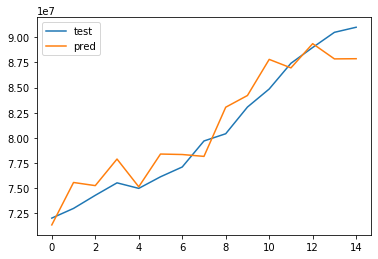

In [17]:
plt.plot(list(y_test), label='test')
plt.plot(y_pred, label='pred')
plt.legend();

# Predict beehives density from crop yields
Either put size of the country as a feature or predict the beehives density (beehives number divided by country area)

In [18]:
crops_1994 = crops[crops.Year >= 1994].copy()
crops_1994

,Area,Item,Year,Yield
18,Afghanistan,"Almonds, with shell",1994,16364.0
19,Afghanistan,"Almonds, with shell",1995,16364.0
20,Afghanistan,"Almonds, with shell",1996,16364.0
21,Afghanistan,"Almonds, with shell",1997,16364.0
22,Afghanistan,"Almonds, with shell",1998,16364.0
...,...,...,...,...
530136,Zimbabwe,Wheat,2013,23430.0
530137,Zimbabwe,Wheat,2014,21958.0
530138,Zimbabwe,Wheat,2015,20486.0
530139,Zimbabwe,Wheat,2016,19014.0


In [19]:
rm_countries = []
rm_countries += list(set(crops[crops.Year == 2017].Area.unique()) - set(crops[crops.Year == 1994].Area.unique()))
rm_countries += list(set(crops[crops.Year == 1994].Area.unique()) - set(crops[crops.Year == 2017].Area.unique()))
crops_1994 = crops_1994[~crops_1994.Area.isin(rm_countries)]

In [20]:
rm_crops = []

len(crops_1994) == len(crops_1994.Area.unique()) * len(crops_1994.Item.unique()) * len(crops_1994.Year.unique())

False

In [21]:
crops_1994

,Area,Item,Year,Yield
18,Afghanistan,"Almonds, with shell",1994,16364.0
19,Afghanistan,"Almonds, with shell",1995,16364.0
20,Afghanistan,"Almonds, with shell",1996,16364.0
21,Afghanistan,"Almonds, with shell",1997,16364.0
22,Afghanistan,"Almonds, with shell",1998,16364.0
...,...,...,...,...
530136,Zimbabwe,Wheat,2013,23430.0
530137,Zimbabwe,Wheat,2014,21958.0
530138,Zimbabwe,Wheat,2015,20486.0
530139,Zimbabwe,Wheat,2016,19014.0


In [799]:
index = pd.MultiIndex.from_product([crops_1994.Area.unique(), crops_1994.Year.unique()], names = ["Area", "Year"])
df = pd.DataFrame(index = index).reset_index()

In [800]:
for item in crops_1994.Item.unique():
    right = crops_1994.loc[crops_1994.Item == item, ['Area', 'Year', 'Yield']]
    
    
    
    if len(right) >= len(df)/20:
        df = df.merge(right, how='left', on=['Area', 'Year'])
        df = df.rename(columns={'Yield': item})

In [801]:
df = df[df.columns[df.isna().sum() < 1500]].dropna()
df

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes
24,Africa,1994,11433.0,11948.0,10432.0,67069.0,62566.0,16024.0,2632.0,2532.0,111361.0,5034.0,82478.0,83280.0,62917.0,195138.0
25,Africa,1995,10586.0,11151.0,9616.0,68048.0,62714.0,13934.0,2685.0,2519.0,121083.0,4909.0,83366.0,84646.0,63262.0,201192.0
26,Africa,1996,12672.0,13237.0,11362.0,70305.0,62675.0,17152.0,2884.0,2707.0,120567.0,5066.0,83006.0,85729.0,64100.0,208953.0
27,Africa,1997,11406.0,12008.0,10360.0,70098.0,62715.0,16209.0,2808.0,2534.0,116021.0,4917.0,86133.0,85818.0,64076.0,198329.0
28,Africa,1998,11718.0,12278.0,10580.0,69495.0,62402.0,15910.0,2859.0,2609.0,123650.0,5087.0,83053.0,86173.0,64046.0,192475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5776,Zimbabwe,2010,7336.0,7337.0,7265.0,64742.0,63669.0,8751.0,3296.0,1448.0,166967.0,4202.0,53051.0,70523.0,66303.0,78125.0
5777,Zimbabwe,2011,5876.0,5877.0,5785.0,66174.0,64389.0,6568.0,3031.0,1214.0,167407.0,3483.0,53110.0,66161.0,61538.0,71524.0
5778,Zimbabwe,2012,6963.0,6964.0,6751.0,68152.0,65455.0,7912.0,2835.0,1058.0,171875.0,4517.0,54287.0,75405.0,72000.0,71212.0
5779,Zimbabwe,2013,6691.0,6693.0,6475.0,68233.0,65455.0,7449.0,3616.0,1378.0,165714.0,4768.0,53412.0,75405.0,72000.0,71212.0


In [802]:
df = df.merge(beehives)

In [803]:
df.dropna(inplace=True)

In [804]:
df

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives
0,Africa,1994,11433.0,11948.0,10432.0,67069.0,62566.0,16024.0,2632.0,2532.0,111361.0,5034.0,82478.0,83280.0,62917.0,195138.0,14069000.0
1,Africa,1995,10586.0,11151.0,9616.0,68048.0,62714.0,13934.0,2685.0,2519.0,121083.0,4909.0,83366.0,84646.0,63262.0,201192.0,14062337.0
2,Africa,1996,12672.0,13237.0,11362.0,70305.0,62675.0,17152.0,2884.0,2707.0,120567.0,5066.0,83006.0,85729.0,64100.0,208953.0,14395882.0
3,Africa,1997,11406.0,12008.0,10360.0,70098.0,62715.0,16209.0,2808.0,2534.0,116021.0,4917.0,86133.0,85818.0,64076.0,198329.0,14158420.0
4,Africa,1998,11718.0,12278.0,10580.0,69495.0,62402.0,15910.0,2859.0,2609.0,123650.0,5087.0,83053.0,86173.0,64046.0,192475.0,14057474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,Zambia,2010,25194.0,25335.0,24676.0,45954.0,47170.0,25871.0,4403.0,2022.0,162228.0,4655.0,53048.0,76796.0,72865.0,96296.0,54000.0
2178,Zambia,2011,27181.0,27314.0,26384.0,45003.0,46674.0,27414.0,6141.0,3189.0,162847.0,4822.0,54167.0,77615.0,72893.0,97732.0,55000.0
2179,Zambia,2012,26766.0,26893.0,25757.0,43657.0,45310.0,26545.0,4948.0,1748.0,161166.0,5161.0,55614.0,78351.0,72917.0,100000.0,56000.0
2180,Zambia,2013,25194.0,25324.0,24245.0,43728.0,45614.0,25382.0,5424.0,1885.0,163930.0,5161.0,55149.0,78331.0,72917.0,98628.0,57000.0


> The problem I have here is that a lot of data is missing and I have to make a tradeof between how many features (crops) vs how many data points I will get without null values

In [397]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

In [398]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.041700957788060704

Now I don't have any motivation left to try and figure out if this is really useless or it is just some problem with predicting this with ridge regression or something similar that could be easily fixed. It's a shame because this could be an interesting thins, but it's hard to use this data.

First thing I should do is convert area to real area (square meters) instead of country names which cannot be used in the model

In [170]:
land = pd.read_csv('data/Inputs_LandUse_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')
land = land.loc[land.Item == 'Country area', ['Area', 'Year', 'Value']]
land.columns = ['Area', 'Year', 'Country Size']
land.head()

,Area,Year,Country Size
0,Afghanistan,1961,65286.0
1,Afghanistan,1962,65286.0
2,Afghanistan,1963,65286.0
3,Afghanistan,1964,65286.0
4,Afghanistan,1965,65286.0


In [171]:
final_df = df.merge(land, on=['Area', 'Year'])
final_df['Area'] = final_df['Country Size']
final_df.drop('Country Size', axis=1, inplace=True)
final_df.head()

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives
0,3031837.5,1994,11433.0,11948.0,10432.0,67069.0,62566.0,16024.0,2632.0,2532.0,111361.0,5034.0,82478.0,83280.0,62917.0,195138.0,14069000.0
1,3031837.5,1995,10586.0,11151.0,9616.0,68048.0,62714.0,13934.0,2685.0,2519.0,121083.0,4909.0,83366.0,84646.0,63262.0,201192.0,14062337.0
2,3031837.5,1996,12672.0,13237.0,11362.0,70305.0,62675.0,17152.0,2884.0,2707.0,120567.0,5066.0,83006.0,85729.0,64100.0,208953.0,14395882.0
3,3031837.5,1997,11406.0,12008.0,10360.0,70098.0,62715.0,16209.0,2808.0,2534.0,116021.0,4917.0,86133.0,85818.0,64076.0,198329.0,14158420.0
4,3031837.5,1998,11718.0,12278.0,10580.0,69495.0,62402.0,15910.0,2859.0,2609.0,123650.0,5087.0,83053.0,86173.0,64046.0,192475.0,14057474.0


In [172]:
X = final_df.iloc[:, 1:-1]
y = final_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

In [173]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.051295844526532686

In [177]:
regr = RandomForestRegressor(n_estimators=200, max_depth=100, random_state=0)
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8077440986862813


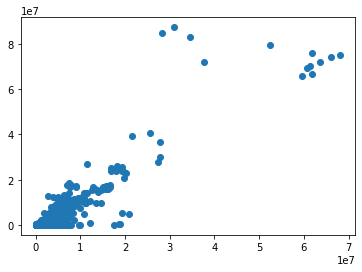

In [178]:
plt.scatter(regr.predict(X_test), y_test);

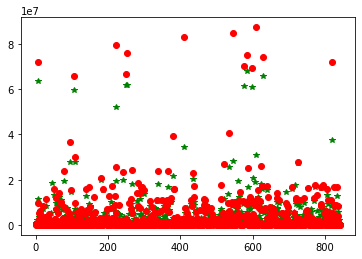

In [179]:
plt.plot(regr.predict(X_test), 'g*', np.array(list(y_test)), 'ro')
plt.show()

In [180]:
regr.feature_importances_

array([0.01122381, 0.02059918, 0.04790551, 0.03617332, 0.03283375,
       0.10888976, 0.0940727 , 0.04786746, 0.10076748, 0.03375402,
       0.11809223, 0.19760838, 0.02565102, 0.09212642, 0.03243498])

In [181]:
X_test.columns[np.argmax(regr.feature_importances_)]

'Roots and Tubers,Total'

This is the most important feature for the model!

In [80]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(60, 100, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [81]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [82]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [83]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
print(base_model.score(X_test, y_test))

best_random = rf_random.best_estimator_
print(best_random.score(X_test, y_test))

0.786679710730216
0.8928037222163543


In [84]:
X_test.columns[np.argmax(rf_random.best_estimator_.feature_importances_)]

'Pulses,Total'

Still the same best feature?

In [85]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 2],
    'n_estimators': [350, 400, 450]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [86]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   50.1s finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [87]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test, y_test)

0.8906805630462398

In [727]:
final_df = df.merge(land, on=['Area', 'Year'])
final_df['Area'] = final_df['Country Size']
final_df.drop('Country Size', axis=1, inplace=True)
final_df = final_df[final_df.Area < final_df.Area.quantile(.95)]
final_df.head()

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives
21,2875.0,1994,24609.0,24609.0,24360.0,139892.0,20911.0,25848.0,3985.0,1514.0,81404.0,7495.0,81404.0,166994.0,107442.0,229449.0,26900.0
22,2875.0,1995,28415.0,28415.0,27940.0,147970.0,30000.0,31300.0,6001.0,1985.0,111323.0,7861.0,111323.0,175875.0,103500.0,241935.0,40000.0
23,2875.0,1996,24509.0,24509.0,28781.0,165156.0,30000.0,32604.0,5974.0,1483.0,106138.0,9101.0,106138.0,193538.0,100000.0,321429.0,53900.0
24,2875.0,1997,28333.0,28333.0,28006.0,146733.0,27913.0,31862.0,5986.0,1798.0,109874.0,8050.0,109874.0,186410.0,105185.0,294118.0,57300.0
25,2875.0,1998,28721.0,28721.0,30099.0,148789.0,31065.0,33416.0,6230.0,2468.0,127212.0,8834.0,127212.0,189206.0,107187.0,300000.0,56500.0


In [728]:
X = final_df.iloc[:, :-1]
y = final_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

rf = RandomForestRegressor(**grid_search.best_params_).fit(X_train, y_train)
rf.score(X_test, y_test)

0.9791409724137788

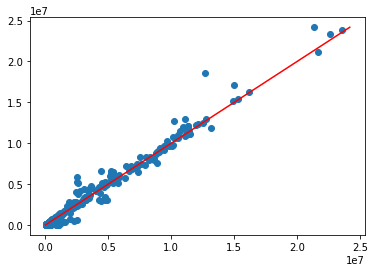

In [729]:
plt.scatter(rf.predict(X_test), y_test)
plt.plot((0, y_test.max()),(0, y_test.max()), c='r');

In [730]:
errors = abs(rf.predict(X_test) - y_test)
print("Deviating from real value by %.2f percent" % (100 * np.median(errors / y_test)))

Deviating from real value by 23.20 percent


These results seem to be meaningful, half of the real values deviate from the predicted one for less than 35%

### We agreed I should divide into train and test set by countries

In [986]:
def split_train_test(df, merged=None):
    np.random.seed(0)
    areas = df.Area.unique()

    train = np.random.choice(areas, size=int(areas.size*0.7), replace=False)
    test = areas[~np.isin(areas, train)]

    X_train = df.loc[df.Area.isin(train), df.columns[df.columns != 'Beehives']]
    y_train = df[df.Area.isin(train)]['Beehives']
    X_test = df.loc[(df.Area.isin(test)) & (df.Year == 2005) & (df.Area > df.Area.quantile(.5)), df.columns[df.columns != 'Beehives']]
    y_test = df[(df.Area.isin(test)) & (df.Year == 2005) & (df.Area > df.Area.quantile(.5))]['Beehives']

    rf = RandomForestRegressor(**grid_search.best_params_).fit(X_train, y_train)
    print(rf.score(X_test, y_test))
    
    plt.figure(figsize=(15, 8))
    plt.scatter(rf.predict(X_test), y_test)
    plt.xlabel('Beehives prediction')
    plt.ylabel('Beehives real')
    plt.plot((0, y_test.max()),(0, y_test.max()), c='r')
    plt.show()
    
    errors = abs(rf.predict(X_test) - y_test)
    print("Deviating from real value by %.2f percent" % (100 * np.median(errors / y_test)))
    
    x = X_test.Area.tolist()
    y = y_test.tolist()
    
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.scatter(x, y)
    ax.scatter(x, rf.predict(X_test), c='r', marker='x')
    plt.xlabel('Area')
    plt.ylabel('Beehives')
    
    for i, size in enumerate(x):
        ax.annotate(merged[merged['Country Size'] == size]['Area'].tolist()[0], (x[i], y[i]))

In [820]:
df.Year.unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [877]:
final_df = df.merge(land, on=['Area', 'Year'])
final_df['Area'] = final_df['Country Size']
final_df.drop('Country Size', axis=1, inplace=True)
final_df = final_df[final_df.Area < final_df.Area.quantile(.95)]
final_df

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives
21,2875.0,1994,24609.0,24609.0,24360.0,139892.0,20911.0,25848.0,3985.0,1514.0,81404.0,7495.0,81404.0,166994.0,107442.0,229449.0,26900.0
22,2875.0,1995,28415.0,28415.0,27940.0,147970.0,30000.0,31300.0,6001.0,1985.0,111323.0,7861.0,111323.0,175875.0,103500.0,241935.0,40000.0
23,2875.0,1996,24509.0,24509.0,28781.0,165156.0,30000.0,32604.0,5974.0,1483.0,106138.0,9101.0,106138.0,193538.0,100000.0,321429.0,53900.0
24,2875.0,1997,28333.0,28333.0,28006.0,146733.0,27913.0,31862.0,5986.0,1798.0,109874.0,8050.0,109874.0,186410.0,105185.0,294118.0,57300.0
25,2875.0,1998,28721.0,28721.0,30099.0,148789.0,31065.0,33416.0,6230.0,2468.0,127212.0,8834.0,127212.0,189206.0,107187.0,300000.0,56500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,75261.0,2010,25194.0,25335.0,24676.0,45954.0,47170.0,25871.0,4403.0,2022.0,162228.0,4655.0,53048.0,76796.0,72865.0,96296.0,54000.0
2103,75261.0,2011,27181.0,27314.0,26384.0,45003.0,46674.0,27414.0,6141.0,3189.0,162847.0,4822.0,54167.0,77615.0,72893.0,97732.0,55000.0
2104,75261.0,2012,26766.0,26893.0,25757.0,43657.0,45310.0,26545.0,4948.0,1748.0,161166.0,5161.0,55614.0,78351.0,72917.0,100000.0,56000.0
2105,75261.0,2013,25194.0,25324.0,24245.0,43728.0,45614.0,25382.0,5424.0,1885.0,163930.0,5161.0,55149.0,78331.0,72917.0,98628.0,57000.0


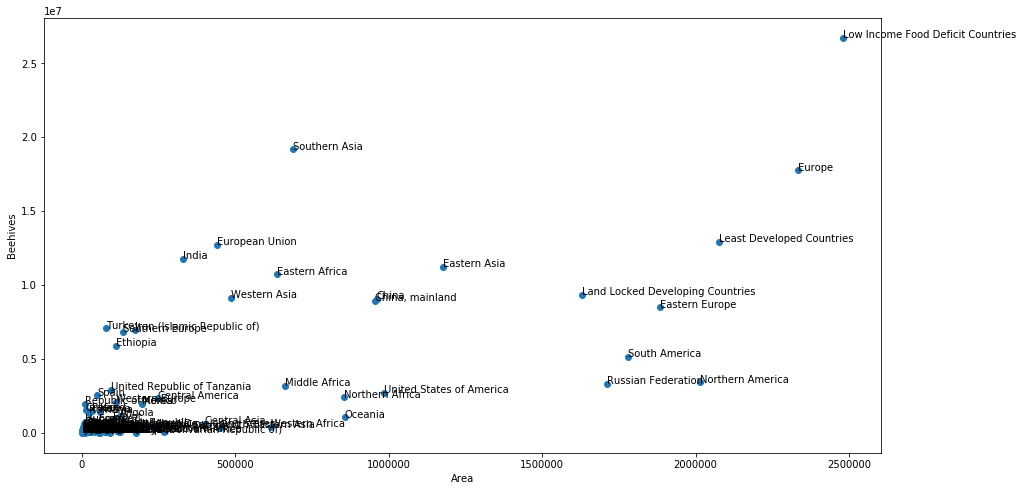

In [834]:
merged = df.merge(land, on=['Area', 'Year'])
final_df2014 = final_df.loc[final_df.Year == 2014]

z = final_df2014.Area.tolist()
y = final_df2014.Beehives.tolist()

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(z, y)
plt.xlabel('Area')
plt.ylabel('Beehives')

for i, size in enumerate(z):
    ax.annotate(merged[merged['Country Size'] == size]['Area'].tolist()[0], (z[i], y[i]))

0.9200544852581395


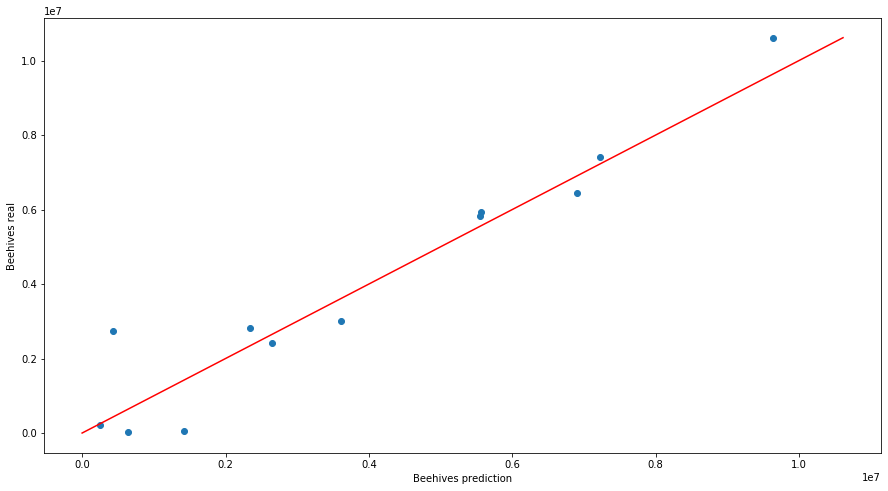

Deviating from real value by 9.75 percent


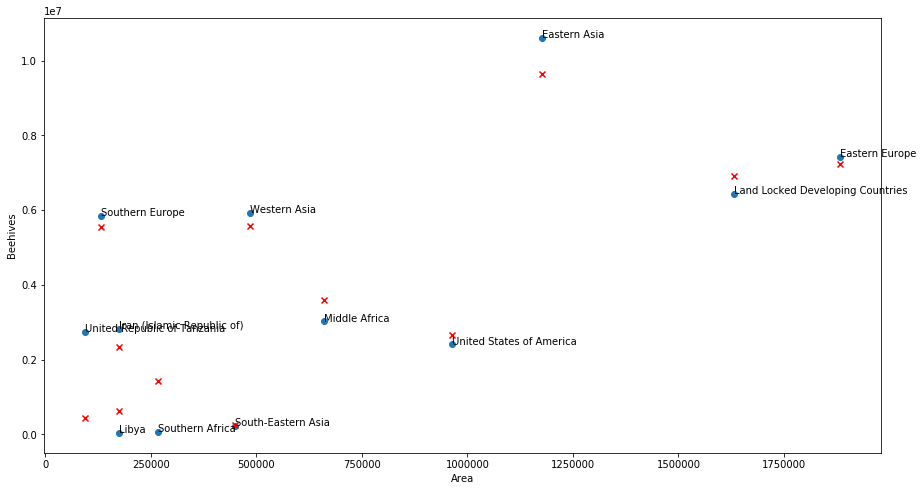

In [987]:
split_train_test(final_df, df.merge(land, on=['Area', 'Year']))

I think the problem is that different kind of crops are grown in different parts of the World. Model can infer that some crop is very important as a feature because some countries that have it have a lot of beehives, but then when some country doesn't have that one at all, it will think that it has less beehives while they actually pollinate some other crop. I should introduce another feature which would help distinguish what part of the world is this so that the model knows which crops are important. Maybe temperature could fix this issue.

In [969]:
def stt(df, merged=None):
    np.random.seed(0)
    areas = df.Area.unique()
    
    asia_area = merged.loc[merged.Area == 'Eastern Asia', 'Country Size'].tolist()[0]

    X_train = df.loc[df.Area != asia_area, df.columns[df.columns != 'Beehives']]
    y_train = df[df.Area != asia_area]['Beehives']
    X_test = df.loc[df.Area == asia_area, df.columns[df.columns != 'Beehives']]
    y_test = df[df.Area == asia_area]['Beehives']
    
    rf = RandomForestRegressor(**grid_search.best_params_).fit(X_train, y_train)

    plt.plot(df[df.Area == usa_area].Year.tolist(), y_test, c='r', label='real values')
    plt.plot(df[df.Area == usa_area].Year.tolist(), rf.predict(X_test), label='predicted values')
    plt.legend()
    plt.title('Comparing values through the years for Eastern Asia')

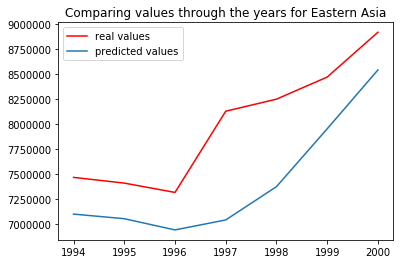

In [970]:
stt(final_df, df.merge(land, on=['Area', 'Year']))

### Let's add geographic location as features

In [824]:
import requests
from bs4 import BeautifulSoup

In [825]:
URL = 'https://developers.google.com/public-data/docs/canonical/countries_csv'
r = requests.get(URL)
page_body = r.text

soup = BeautifulSoup(page_body, 'html.parser')
soup.title.string

'countries.csv \xa0|\xa0 Dataset Publishing Language \xa0|\xa0 Google Developers'

In [826]:
locations = []
first = True

for line in soup.find_all('tr'):

    if first:
        first = False
        continue
    
    locations.append({'Latitude': line.find_all('td')[1].text,
                  'Longitude': line.find_all('td')[2].text, 
                  'Area': line.find_all('td')[3].text})
    
loc = pd.DataFrame(locations)

In [827]:
loc.replace(np.nan, 0, regex=True)
loc['Latitude'] = pd.to_numeric(loc['Latitude'],errors='coerce')
loc['Longitude'] = pd.to_numeric(loc['Longitude'],errors='coerce')
loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
Latitude     244 non-null float64
Longitude    244 non-null float64
Area         245 non-null object
dtypes: float64(2), object(1)
memory usage: 5.9+ KB


In [828]:
np.intersect1d(df.Area.unique(), loc.Area.unique()).size

61

The intersection is way too small, but we will try it anyway. We probably won't have enough data to train a model.

In [836]:
df_loc = df.merge(loc, on='Area')
df_loc

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives,Latitude,Longitude
0,Albania,1994,24609.0,24609.0,24360.0,139892.0,20911.0,25848.0,3985.0,1514.0,81404.0,7495.0,81404.0,166994.0,107442.0,229449.0,26900.0,41.153332,20.168331
1,Albania,1995,28415.0,28415.0,27940.0,147970.0,30000.0,31300.0,6001.0,1985.0,111323.0,7861.0,111323.0,175875.0,103500.0,241935.0,40000.0,41.153332,20.168331
2,Albania,1996,24509.0,24509.0,28781.0,165156.0,30000.0,32604.0,5974.0,1483.0,106138.0,9101.0,106138.0,193538.0,100000.0,321429.0,53900.0,41.153332,20.168331
3,Albania,1997,28333.0,28333.0,28006.0,146733.0,27913.0,31862.0,5986.0,1798.0,109874.0,8050.0,109874.0,186410.0,105185.0,294118.0,57300.0,41.153332,20.168331
4,Albania,1998,28721.0,28721.0,30099.0,148789.0,31065.0,33416.0,6230.0,2468.0,127212.0,8834.0,127212.0,189206.0,107187.0,300000.0,56500.0,41.153332,20.168331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,Zambia,2010,25194.0,25335.0,24676.0,45954.0,47170.0,25871.0,4403.0,2022.0,162228.0,4655.0,53048.0,76796.0,72865.0,96296.0,54000.0,-13.133897,27.849332
1238,Zambia,2011,27181.0,27314.0,26384.0,45003.0,46674.0,27414.0,6141.0,3189.0,162847.0,4822.0,54167.0,77615.0,72893.0,97732.0,55000.0,-13.133897,27.849332
1239,Zambia,2012,26766.0,26893.0,25757.0,43657.0,45310.0,26545.0,4948.0,1748.0,161166.0,5161.0,55614.0,78351.0,72917.0,100000.0,56000.0,-13.133897,27.849332
1240,Zambia,2013,25194.0,25324.0,24245.0,43728.0,45614.0,25382.0,5424.0,1885.0,163930.0,5161.0,55149.0,78331.0,72917.0,98628.0,57000.0,-13.133897,27.849332


In [837]:
final_df = df_loc.merge(land, on=['Area', 'Year'])
final_df['Area'] = final_df['Country Size']
final_df.drop('Country Size', axis=1, inplace=True)
final_df = final_df[final_df.Area < final_df.Area.quantile(.95)]
final_df

,Area,Year,Cereals (Rice Milled Eqv),"Cereals,Total","Coarse Grain, Total",Fruit Primary,"Fruit, fresh nes",Maize,"Oilcrops, Cake Equivalent","Oilcrops, Oil Equivalent",Potatoes,"Pulses,Total","Roots and Tubers,Total",Vegetables Primary,"Vegetables, fresh nes",Tomatoes,Beehives,Latitude,Longitude
0,2875.0,1994,24609.0,24609.0,24360.0,139892.0,20911.0,25848.0,3985.0,1514.0,81404.0,7495.0,81404.0,166994.0,107442.0,229449.0,26900.0,41.153332,20.168331
1,2875.0,1995,28415.0,28415.0,27940.0,147970.0,30000.0,31300.0,6001.0,1985.0,111323.0,7861.0,111323.0,175875.0,103500.0,241935.0,40000.0,41.153332,20.168331
2,2875.0,1996,24509.0,24509.0,28781.0,165156.0,30000.0,32604.0,5974.0,1483.0,106138.0,9101.0,106138.0,193538.0,100000.0,321429.0,53900.0,41.153332,20.168331
3,2875.0,1997,28333.0,28333.0,28006.0,146733.0,27913.0,31862.0,5986.0,1798.0,109874.0,8050.0,109874.0,186410.0,105185.0,294118.0,57300.0,41.153332,20.168331
4,2875.0,1998,28721.0,28721.0,30099.0,148789.0,31065.0,33416.0,6230.0,2468.0,127212.0,8834.0,127212.0,189206.0,107187.0,300000.0,56500.0,41.153332,20.168331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,75261.0,2010,25194.0,25335.0,24676.0,45954.0,47170.0,25871.0,4403.0,2022.0,162228.0,4655.0,53048.0,76796.0,72865.0,96296.0,54000.0,-13.133897,27.849332
1238,75261.0,2011,27181.0,27314.0,26384.0,45003.0,46674.0,27414.0,6141.0,3189.0,162847.0,4822.0,54167.0,77615.0,72893.0,97732.0,55000.0,-13.133897,27.849332
1239,75261.0,2012,26766.0,26893.0,25757.0,43657.0,45310.0,26545.0,4948.0,1748.0,161166.0,5161.0,55614.0,78351.0,72917.0,100000.0,56000.0,-13.133897,27.849332
1240,75261.0,2013,25194.0,25324.0,24245.0,43728.0,45614.0,25382.0,5424.0,1885.0,163930.0,5161.0,55149.0,78331.0,72917.0,98628.0,57000.0,-13.133897,27.849332


0.01374197248372544
Deviating from real value by 78.32 percent


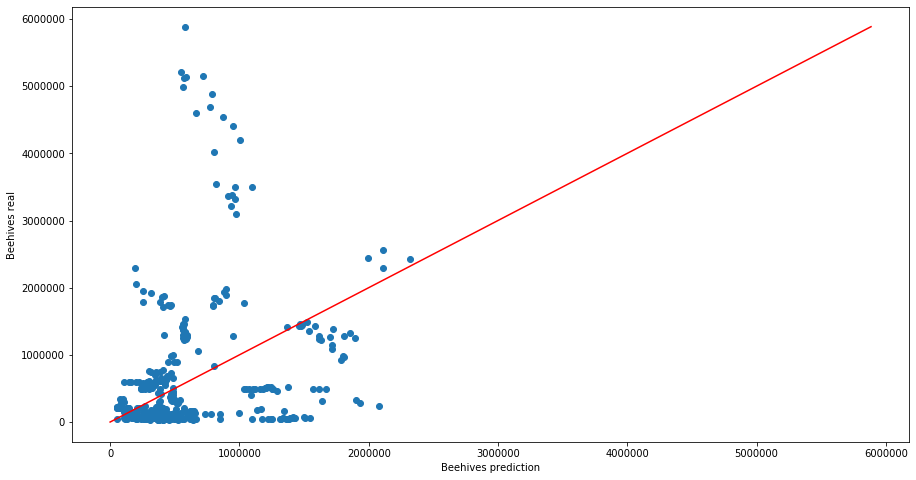

In [838]:
split_train_test(final_df)

In [832]:
final_df.Area.unique().size

87

We lost too many countries when merging with location dataframe so the prediction is very bad because we don't have enough data to train the model on.